In [2]:
import string
import collections
import itertools as it

In [3]:
from pysword.modules import SwordModules
modules = SwordModules(u'KJVA.zip')
modules.parse_modules()
bible = modules.get_bible_from_module(u'KJVA')
output = bible.get(books=[u'john',u'matthew'])
corpus = [verse for verse in output.split('\n')]

ANALISIS DE SENTENCIAS

Word Cleaning : Removemos los espacios al inicio y al final de cada versículo. Además pasamos toda palabra a minúsculas.

In [4]:
words_list=[]
sentences = []

for text in corpus:
    for each_word in text.strip().split(" "): 
        words_list.append(each_word.lower())      #Coleccionando cada versículo en una variable temporal
    sentences.append(words_list)
    words_list = []                               #Limpiamos la variable temporal

Ahora eliminamos los signos de puntiación, asignados a la variable "exclude"

In [21]:
## VAMOS A UTILIZAR UN METODO DE STRING LLAMADO JOIN

words_complete_cleaned=[]
temp = []
sentences_cleaned = []

for sentence in sentences:
    for word in sentence:
        cleaned_word =''.join(ch for ch in word if ch not in exclude)
        temp.append(cleaned_word)
    sentences_cleaned.append(temp)
    temp = []

In [22]:
CONTEO_TOTAL= collections.Counter(list(it.chain.from_iterable(sentences_cleaned)))

Análisis de Bigramas

In [24]:
def FindCurrentBigrams(sentence):
    returned_list=[]
    for i in range(len(sentence)-1):
        returned_list.append(sentence[i]+sentence[i+1])
    return returned_list

In [26]:
temp = []
sentences_cleaned_wrapped=[]

for sentence_cleaned in sentences_cleaned:
    temp.append('xx')     #contexto de inicio
    for word in sentence_cleaned:
        temp.append(word)
    temp.append('xz')     #contexto de fin
    sentences_cleaned_wrapped.append(temp)
    temp=[]

In [27]:
lista_bigramas_existentes=[]

for sentence_cleaned in sentences_cleaned_wrapped:
    lista_bigramas_existentes.append(FindCurrentBigrams(sentence_cleaned))

In [28]:
CONTEO_DE_BIGRAMAS=collections.Counter(list(it.chain.from_iterable(lista_bigramas_existentes)))

In [29]:
#Ejemplo
sentence = sentences_cleaned_wrapped[23]
TOTAL_SENTENCES_QTY = len(verses)
probabilidades = []

In [30]:
for i,bigram in enumerate(FindCurrentBigrams(sentence)):
    if i==0:
        prob1 = CONTEO_DE_BIGRAMAS[bigram]/TOTAL_SENTENCES_QTY
    else:
        prob2 = CONTEO_DE_BIGRAMAS[bigram]/(CONTEO_TOTAL[sentence[i]])
        
        probabilidades.append(prob2)
        
probabilidades.append(prob1)

for i in range(len(probabilidades)-1):
    s = probabilidades[i]*probabilidades[i+1]
    
print(s)

0.005923600209314495


In [45]:
lista_probabilidades=[]
probabilidades = []
for sentence in sentences_cleaned_wrapped:
    for i,bigram in enumerate(FindCurrentBigrams(sentence)):
        if i==0:
            prob1 = CONTEO_DE_BIGRAMAS[bigram]/TOTAL_SENTENCES_QTY
        else:
            prob2 = CONTEO_DE_BIGRAMAS[bigram]/(CONTEO_TOTAL[sentence[i]])

            probabilidades.append(prob2)

    probabilidades.append(prob1)

    for i in range(len(probabilidades)-1):
        s = probabilidades[i]*probabilidades[i+1]
    probabilidades = []
        
    lista_probabilidades.append(s)
    

Observaciones

In [42]:
import matplotlib.pyplot as plt

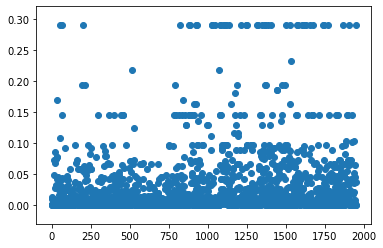

In [43]:
plt.scatter(range(len(lista_probabilidades)),lista_probabilidades)

In [36]:
max(list(zip(lista_probabilidades,temp)))

(0.29025641025641025, 1946)

In [37]:
verses[1946]

'And when they saw him, they worshipped him: but some doubted.'

In [44]:
CONTEO_TOTAL['worshipped']

10